This project was meant to learn how to use SciKitLearn, which is a higher-level machine learning library that interacts with NumPy. We are to compare the performance of linear and polynomial regression models. This is done by first developing a linear model for 1 feature, extending it to a polynomial model, then repeating the steps for all 13 features

First we grab the data from the boston.npz dataset, a dataset containing the Boston house-price data of Harrison, D. and Rubinfeld. In doing this we gain two different lists. A feauture and a target list. We can seperate these easily with python to get their own respective lists. 
<br>Feature list containing:
<br>[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
<br>Target list containing:
<br>[MEDV]

In [2]:
import numpy as np

data = np.load('boston.npz')
dataList = data.files
features, target = data[dataList[0]], data[dataList[1]] 

Next we use sklearn's tran_test_split() function under the model_selction module to split the two data sets into train and test data

In [3]:
from sklearn.model_selection import train_test_split
X, Y = np.array(features), np.array(target)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=(2021-3-11))

After doing so, we plot a scatter plot showing the relationship between the percentage of the population that is lower status (LSTAT) and the median value of a home.

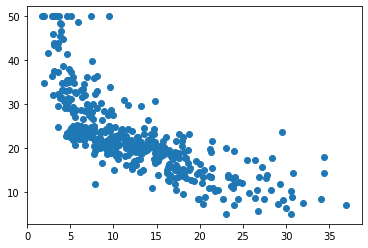

In [4]:
import matplotlib.pyplot as plt
x = np.array(X_train[:,12][:,None])
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.scatter(x, Y_train)
plt.show()

From this, we can see that a linear model may be able to fit the data well, however, this does seem to have a parabloic shape. Suggesting that a polynomial model of degree 2 might fit the data better

We shall explore this by using sklearn's linear_model module. Specifically the LinearRegression() class 

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x,Y_train)

Training the data with sklearn gives us multiple advantages. One of them is autocalculating our weights and intercept. By doing this we are able to formulate a linear function with the built in class attributes like so: <br>
$$ t = \text{reg.intercept_} + \text{reg.coef_}*x $$



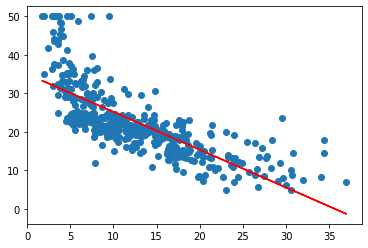

In [6]:
t = reg.intercept_ + reg.coef_ * x
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.scatter(x, Y_train)
plt.plot(x,t,'r')

By graphing this we see that a linear model does have some resememblence to the original data, however we can do better.

So we can compare the different models we shall take not of the MSE for a 1st degree polynomial function. 

In [7]:
from sklearn.metrics import mean_squared_error
#training set

Y_train_hat = reg.predict(x)
loss = mean_squared_error(Y_train, Y_train_hat)
print(loss)

38.47893344802523


In [8]:
x = np.array(X_test[:,12][:,None])
#test set

Y_test_hat = reg.predict(x)
loss = mean_squared_error(Y_test, Y_test_hat)
print(loss)

38.75054664279497


In this case, we obtain an MSE by using sklearn's mean_squared_error() function provided in the metrics module. Doing this gives us a training MSE of: 38.47893344802523. Similarly doing the same for the test set we gain a test MSE of 38.75054664279497

Doing this we see that the training and test MSE are almost identical. This suggests that we are neither overfitting or underfitting our data

Now that we have this information, we can test a 2nd degree polynomial model. To do this, we just add a 2nd column to our train and test data, where the 2nd column is the squared of the first. 

In [9]:
x_1 = np.array(X_train[:,12][:,None]).T[0]
x_2 = np.array([x**2 for x in X_train[:,12]])
X_new = np.hstack((x_1[:][:,None], x_2[:][:,None]))
reg = LinearRegression().fit(X_new, Y_train)

Y_train_hat = reg.predict(X_new)
loss = mean_squared_error(Y_train, Y_train_hat)

x_test_1 = np.array(X_test[:,12][:,None]).T[0]
x_test_2 = np.array([x**2 for x in X_test[:,12]])
X_test_new = np.hstack((x_test_1[:][:,None], x_test_2[:][:,None]))
reg_test = LinearRegression().fit(X_test_new, Y_test)


Y_test_hat = reg_test.predict(X_test_new)
loss_test = mean_squared_error(Y_test, Y_test_hat)
print(loss)
print(loss_test)

30.598514349370962
29.15762004844459


As expected, increasing the order of the polynomial will decrease our training MSE. This is because having a higher degree polynomial will fit the data better than a lower degree polynomial. However, this may not always be true for test data due to overfitting our model. In thise case, we see that our testing MSE decreased as well. Suggesting that a 2nd degree polynomial suits the data better than a 1st degree. We can visualize this with the function: <br>

$$\text{t} = \text{reg.coef_[0]} * x + \text{reg.coef_[1]} * x^2$$

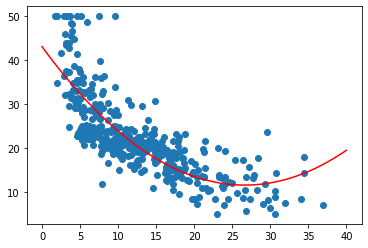

In [10]:
x_plot = np.linspace(0,40, num=404)
t_plot = reg.intercept_ + reg.coef_[0]*x_plot + reg.coef_[1]*x_plot**2
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.scatter(x_1, Y_train)
plt.plot(x_plot,t_plot,'r')


Once we extend this to include all features we come to some interesting conclusions. We see that our training and test MSE's are both lower than that of a polynomial model with only 1 feature. This is most likely due to the feature we previously tested for having a rather low influence on the data set. We can verify this by looking at the weights of our fully featured model.

In [14]:
reg = LinearRegression().fit(X_train, Y_train)

Y_train_hat = reg.predict(X_train)
loss = mean_squared_error(Y_train, Y_train_hat)

Y_test_hat = reg.predict(X_test)
loss_test = mean_squared_error(Y_test, Y_test_hat)

print(loss)
print(loss_test)
print(reg.coef_)

21.04634080534237
25.97640893599675
[-1.19721961e-01  5.29635924e-02  5.16150347e-02  2.55847703e+00
 -1.72524020e+01  4.08697043e+00 -4.64415129e-03 -1.52421308e+00
  2.99638323e-01 -1.37152390e-02 -8.48912621e-01  6.56971068e-03
 -5.33276034e-01]


Doing this we see that our LSTAT feature doesn't have the most influence on the model. In fact, the feature that has the most influence is NOX, which shows nitric oxide concentration.

We can further explore the effects of switching a polynomial model to a linear model by creating a model that is of degree 2 and has all of our features. 

In [12]:
x_2 = np.array([x**2 for x in X_train])
X_new = np.hstack((X_train[:],x_2[:]))
reg = LinearRegression().fit(X_new, Y_train)

Y_train_hat = reg.predict(X_new)
loss = mean_squared_error(Y_train, Y_train_hat)

x_2_new = np.array([x**2 for x in X_test])
X_new_test = np.hstack((X_test[:],x_2_new[:]))
Y_test_hat = reg.predict(X_new_test)
loss_test = mean_squared_error(Y_test, Y_test_hat)
print(loss)
print(loss_test)

13.508100802461735
17.857896093000637


In doing this we see the training and test MSE decrease from our linear model. However, this model does have higher seperation from the test to training MSE. This suggests that we are overfitting our data.

Another test we can do is to use sklearn's PolynomialFeatures class from the preprocessing module. Doing this we are able to get interaction features, where the features are multiplied together. This turns our regression model from: <br>

$$ y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} $$

To one where we include another term at the end known as the interaction term.

$$ y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{3}X_{1}X_{2}$$

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_new = poly.fit_transform(X_train)
reg = LinearRegression().fit(X_new, Y_train)

Y_train_hat = reg.predict(X_new)
loss = mean_squared_error(Y_train, Y_train_hat)

X_test_new = poly.fit_transform(X_test)
Y_test_hat = reg.predict(X_test_new)
loss_test = mean_squared_error(Y_test, Y_test_hat)
print(loss)
print(loss_test)

10.83019585740058
20.46747844710467


Adding an interaction term drops the training MSE even further, however this also increases the test MSE and the seperation it has with the training MSE. This suggests that adding interaction terms does seem to overfit our data.